In [1]:
data <- read.csv('adult_sal.csv')

In [2]:
head(data)

,X,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
data <- select(data,-X)

In [5]:
head(data)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
str(data)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: chr  "State-gov" "Self-emp-not-inc" "Private" "Private" ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : chr  "Bachelors" "Bachelors" "HS-grad" "11th" ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : chr  "Never-married" "Married-civ-spouse" "Divorced" "Married-civ-spouse" ...
 $ occupation   : chr  "Adm-clerical" "Exec-managerial" "Handlers-cleaners" "Handlers-cleaners" ...
 $ relationship : chr  "Not-in-family" "Husband" "Not-in-family" "Husband" ...
 $ race         : chr  "White" "White" "White" "Black" ...
 $ sex          : chr  "Male" "Male" "Male" "Male" ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $ country      : chr  "United-States" "United-States" "U

In [7]:
summary(data)

      age        type_employer          fnlwgt         education        
 Min.   :17.00   Length:32561       Min.   :  12285   Length:32561      
 1st Qu.:28.00   Class :character   1st Qu.: 117827   Class :character  
 Median :37.00   Mode  :character   Median : 178356   Mode  :character  
 Mean   :38.58                      Mean   : 189778                     
 3rd Qu.:48.00                      3rd Qu.: 237051                     
 Max.   :90.00                      Max.   :1484705                     
 education_num     marital           occupation        relationship      
 Min.   : 1.00   Length:32561       Length:32561       Length:32561      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

In [8]:
table(data$type_employer)


               ?      Federal-gov        Local-gov     Never-worked 
            1836              960             2093                7 
         Private     Self-emp-inc Self-emp-not-inc        State-gov 
           22696             1116             2541             1298 
     Without-pay 
              14 

In [9]:
unemp <- function(job){
    job <- as.character(job)
    if (job=="Never-worked" | job=="Without-pay"){
        return ("Unemployed")
    }else{
        return(job)
    } 
}

In [10]:
data$type_employer <- sapply(data$type_employer,unemp)        

In [11]:
table(data$type_employer)


               ?      Federal-gov        Local-gov          Private 
            1836              960             2093            22696 
    Self-emp-inc Self-emp-not-inc        State-gov       Unemployed 
            1116             2541             1298               21 

In [12]:
jobs <- function(job){
    job <- as.character(job)
    if (job=="Self-emp-inc" | job=="Self-emp-not-inc"){
        return("self-emp")
    }else if (job=="Local-gov" | job=="State-gov"){
        return ("SL-gov")
    }else{
            return(job)
        }
}

In [13]:
data$type_employer <- sapply(data$type_employer,jobs)        

In [14]:
table(data$type_employer)


          ? Federal-gov     Private    self-emp      SL-gov  Unemployed 
       1836         960       22696        3657        3391          21 

In [15]:
table(data$marital)


             Divorced     Married-AF-spouse    Married-civ-spouse 
                 4443                    23                 14976 
Married-spouse-absent         Never-married             Separated 
                  418                 10683                  1025 
              Widowed 
                  993 

In [16]:
group_marital <- function(mar){
    mar <- as.character(mar)
    if (mar=='Separated' | mar=='Divorced' | mar=='Widowed'){
        return('Not-Married')
        
    }else if(mar=='Never-married'){
        return(mar)
    }else{
        return('Married')
    }
}

In [17]:
data$marital <- sapply(data$marital,group_marital)        

In [18]:
table(data$marital)


      Married Never-married   Not-Married 
        15417         10683          6461 

In [19]:
table(data$country)


                         ?                   Cambodia 
                       583                         19 
                    Canada                      China 
                       121                         75 
                  Columbia                       Cuba 
                        59                         95 
        Dominican-Republic                    Ecuador 
                        70                         28 
               El-Salvador                    England 
                       106                         90 
                    France                    Germany 
                        29                        137 
                    Greece                  Guatemala 
                        29                         64 
                     Haiti         Holand-Netherlands 
                        44                          1 
                  Honduras                       Hong 
                        13                         20 
         

In [20]:
Asia <- c('China','Hong','India','Iran','Cambodia','Japan', 'Laos' ,
          'Philippines' ,'Vietnam' ,'Taiwan', 'Thailand')

North.America <- c('Canada','United-States','Puerto-Rico' )

Europe <- c('England' ,'France', 'Germany' ,'Greece','Holand-Netherlands','Hungary',
            'Ireland','Italy','Poland','Portugal','Scotland','Yugoslavia')

Latin.and.South.America <- c('Columbia','Cuba','Dominican-Republic','Ecuador',
                             'El-Salvador','Guatemala','Haiti','Honduras',
                             'Mexico','Nicaragua','Outlying-US(Guam-USVI-etc)','Peru',
                            'Jamaica','Trinadad&Tobago')
Other <- c('South')

In [21]:
group_country <- function(ctry){
    if (ctry %in% Asia){
        return('Asia')
    }else if (ctry %in% North.America){
        return('North.America')
    }else if (ctry %in% Europe){
        return('Europe')
    }else if (ctry %in% Latin.and.South.America){
        return('Latin.and.South.America')
    }else{
        return('Other')      
    }
}

In [22]:
data$country <- sapply(data$country,group_country)

In [23]:
table(data$country)


                   Asia                  Europe Latin.and.South.America 
                    671                     521                    1301 
          North.America                   Other 
                  29405                     663 

In [24]:
data$type_employer <- sapply(data$type_employer,factor)
data$country <- sapply(data$country,factor)
data$marital <- sapply(data$marital,factor)

In [25]:
str(data)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 6 levels "SL-gov","self-emp",..: 1 2 3 3 3 3 3 2 3 3 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : chr  "Bachelors" "Bachelors" "HS-grad" "11th" ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 3 levels "Never-married",..: 1 2 3 2 2 2 2 2 1 2 ...
 $ occupation   : chr  "Adm-clerical" "Exec-managerial" "Handlers-cleaners" "Handlers-cleaners" ...
 $ relationship : chr  "Not-in-family" "Husband" "Not-in-family" "Husband" ...
 $ race         : chr  "White" "White" "White" "Black" ...
 $ sex          : chr  "Male" "Male" "Male" "Male" ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $ country      : Factor w/ 5 levels "North.America",..: 1 1 1 1 

In [26]:
head(data)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
,<int>,<fct>,<int>,<chr>,<int>,<fct>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<fct>,<chr>
1,39,SL-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North.America,<=50K
2,50,self-emp,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,North.America,<=50K
3,38,Private,215646,HS-grad,9,Not-Married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North.America,<=50K
4,53,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,North.America,<=50K
5,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Latin.and.South.America,<=50K
6,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,North.America,<=50K


In [27]:
library(Amelia)

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



In [28]:
data[data=="?"] <- NA

In [29]:
head(data)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
,<int>,<fct>,<int>,<chr>,<int>,<fct>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<fct>,<chr>
1,39,SL-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North.America,<=50K
2,50,self-emp,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,North.America,<=50K
3,38,Private,215646,HS-grad,9,Not-Married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North.America,<=50K
4,53,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,North.America,<=50K
5,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Latin.and.South.America,<=50K
6,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,North.America,<=50K


In [30]:
table(data$type_employer)


     SL-gov    self-emp     Private Federal-gov           ?  Unemployed 
       3391        3657       22696         960           0          21 

In [31]:
data$type_employer <- sapply(data$type_employer,factor)
data$country <- sapply(data$country,factor)
data$marital <- sapply(data$marital,factor)
data$occupation <- sapply(data$occupation,factor)

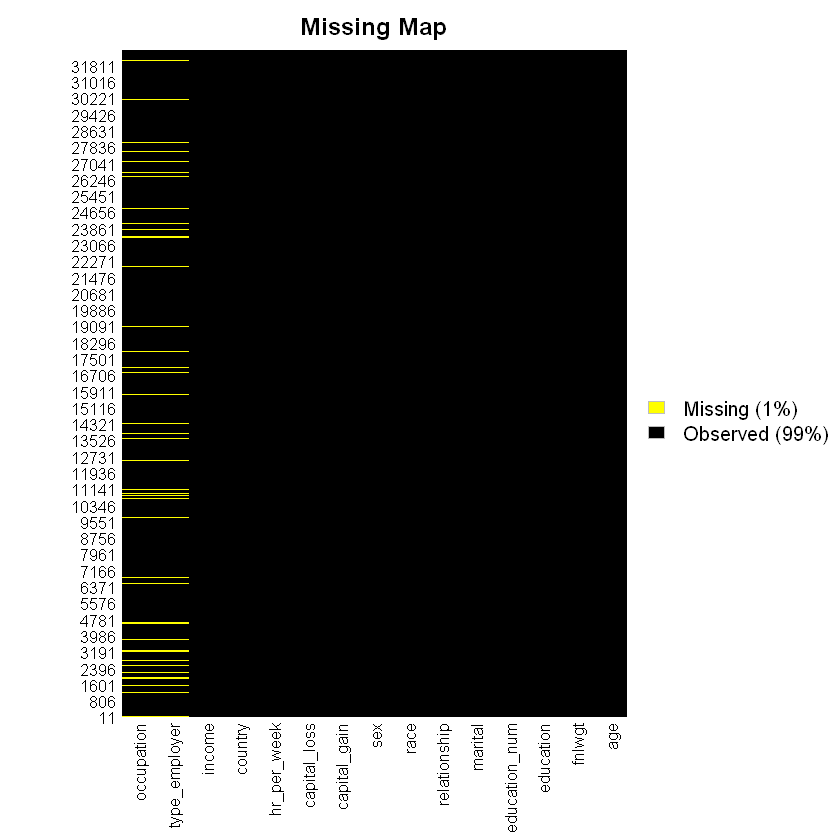

In [32]:
missmap(data,main = "Missing Map",col=c("yellow","black"),legend = T)

In [33]:
data <- na.omit(data)

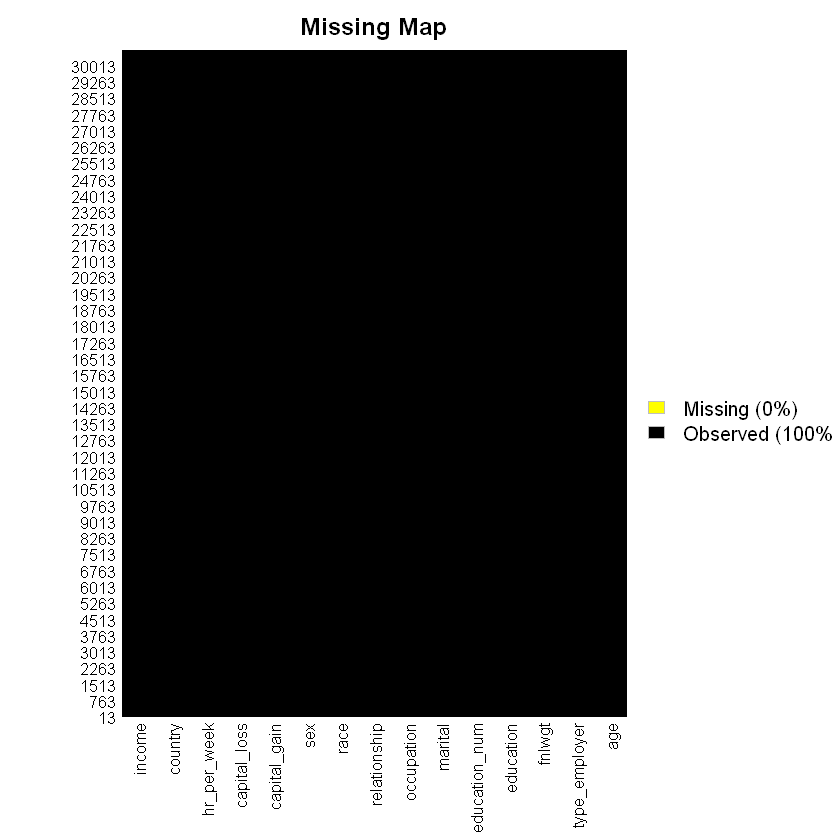

In [34]:
missmap(data,main = "Missing Map",col=c("yellow","black"),legend = T)

In [35]:
library(ggplot2)
library(dplyr)

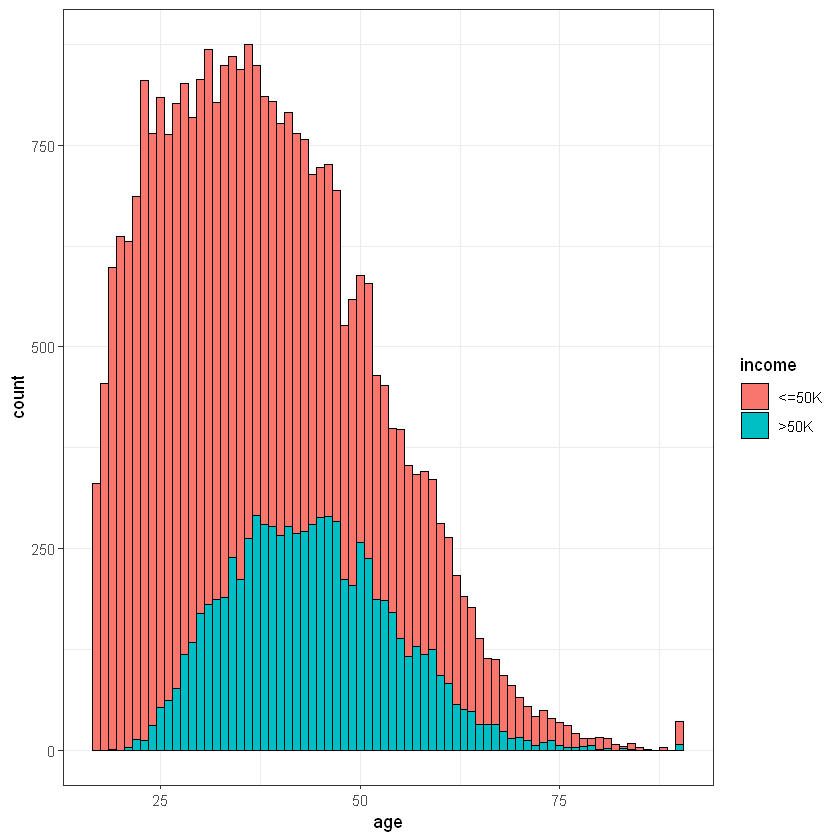

In [36]:
r <- ggplot(data,aes(age))+geom_histogram(aes(fill=income),color="black",binwidth = 1)+theme_bw()
r

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



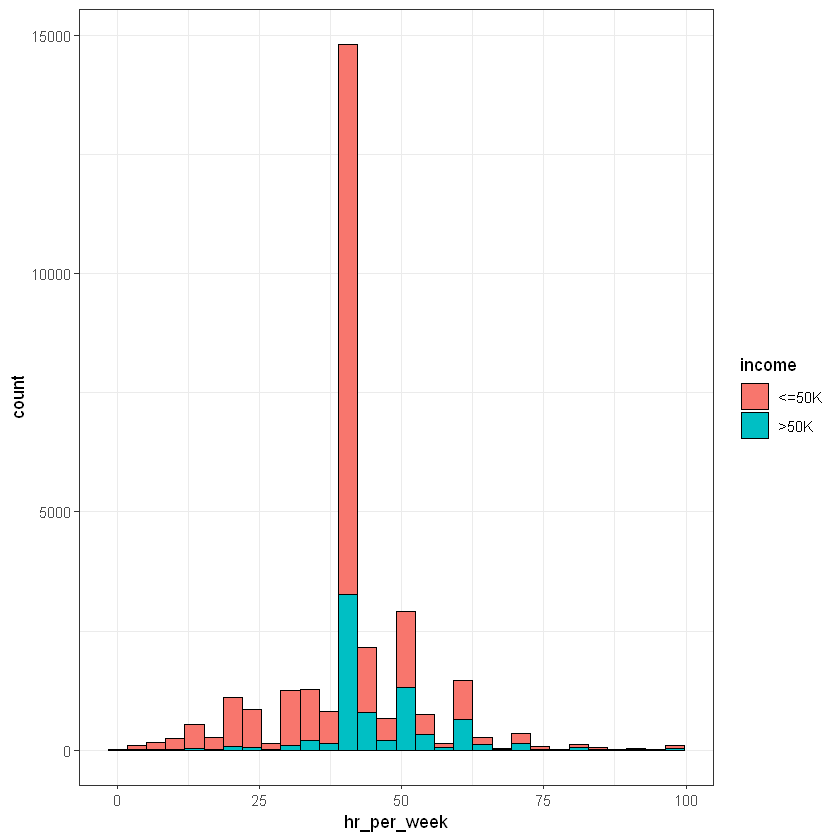

In [37]:
r <- ggplot(data,aes(hr_per_week)) + geom_histogram(aes(fill=income),color="black") + theme_bw()
r

In [38]:
data <- rename(data,region=country)

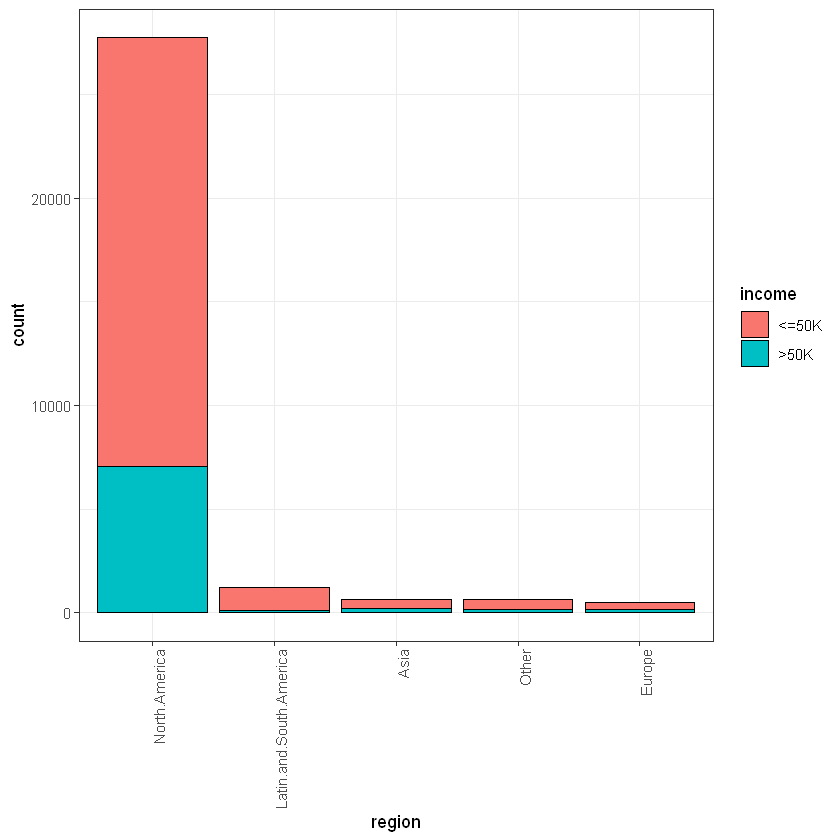

In [39]:
r <- ggplot(data,aes(region)) + geom_bar(aes(fill=income),color='black')+theme_bw()
r <- r + theme(axis.text.x = element_text(angle = 90, hjust = 1))
r

In [40]:
head(data)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,region,income
,<int>,<fct>,<int>,<chr>,<int>,<fct>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<fct>,<chr>
1,39,SL-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North.America,<=50K
2,50,self-emp,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,North.America,<=50K
3,38,Private,215646,HS-grad,9,Not-Married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North.America,<=50K
4,53,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,North.America,<=50K
5,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Latin.and.South.America,<=50K
6,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,North.America,<=50K


In [41]:
data$income <- sapply(data$income,factor)

In [42]:
head(data)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,region,income
,<int>,<fct>,<int>,<chr>,<int>,<fct>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<fct>,<fct>
1,39,SL-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North.America,<=50K
2,50,self-emp,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,North.America,<=50K
3,38,Private,215646,HS-grad,9,Not-Married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North.America,<=50K
4,53,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,North.America,<=50K
5,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Latin.and.South.America,<=50K
6,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,North.America,<=50K


In [43]:
library(caTools)
set.seed(101) 
sample <- sample.split(data$income, SplitRatio = 0.70)
train = subset(data, sample == TRUE)
test = subset(data, sample == FALSE)

In [44]:
model = glm(income ~ ., family = binomial(logit), data = train)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [45]:
summary(model)


Call:
glm(formula = income ~ ., family = binomial(logit), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1163  -0.5172  -0.1965   0.0000   3.6235  

Coefficients: (1 not defined because of singularities)
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -7.364e+00  4.245e-01 -17.346  < 2e-16 ***
age                            2.534e-02  2.007e-03  12.627  < 2e-16 ***
type_employerself-emp          7.501e-03  8.999e-02   0.083 0.933571    
type_employerPrivate           2.371e-01  7.321e-02   3.239 0.001198 ** 
type_employerFederal-gov       6.835e-01  1.266e-01   5.399 6.71e-08 ***
type_employerUnemployed       -1.346e+01  3.688e+02  -0.036 0.970888    
fnlwgt                         5.424e-07  2.085e-07   2.601 0.009291 ** 
education11th                  2.094e-01  2.570e-01   0.814 0.415384    
education12th                  3.925e-01  3.410e-01   1.151 0.249612    
education1st-4th           

In [46]:
step_model <- step(model)

Start:  AIC=14112.05
income ~ age + type_employer + fnlwgt + education + education_num + 
    marital + occupation + relationship + race + sex + capital_gain + 
    capital_loss + hr_per_week + region



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=14112.05
income ~ age + type_employer + fnlwgt + education + marital + 
    occupation + relationship + race + sex + capital_gain + capital_loss + 
    hr_per_week + region



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                Df Deviance   AIC
<none>                14004 14112
- fnlwgt         1    14011 14117
- race           4    14019 14119
- region         4    14026 14126
- type_employer  4    14050 14150
- marital        2    14060 14164
- sex            1    14097 14203
- age            1    14165 14271
- capital_loss   1    14217 14323
- hr_per_week    1    14222 14328
- relationship   5    14288 14386
- occupation    13    14444 14526
- education     15    14718 14796
- capital_gain   1    15248 15354


In [47]:
summary(step_model)


Call:
glm(formula = income ~ age + type_employer + fnlwgt + education + 
    marital + occupation + relationship + race + sex + capital_gain + 
    capital_loss + hr_per_week + region, family = binomial(logit), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1163  -0.5172  -0.1965   0.0000   3.6235  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -7.364e+00  4.245e-01 -17.346  < 2e-16 ***
age                            2.534e-02  2.007e-03  12.627  < 2e-16 ***
type_employerself-emp          7.501e-03  8.999e-02   0.083 0.933571    
type_employerPrivate           2.371e-01  7.321e-02   3.239 0.001198 ** 
type_employerFederal-gov       6.835e-01  1.266e-01   5.399 6.71e-08 ***
type_employerUnemployed       -1.346e+01  3.688e+02  -0.036 0.970888    
fnlwgt                         5.424e-07  2.085e-07   2.601 0.009291 ** 
education11th                  2.094e-01  2.570e-01   0.

In [48]:
test$predicted.income = predict(model, newdata=test, type="response")

table(test$income, test$predicted.income > 0.5)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


       
        FALSE TRUE
  <=50K  6372  548
  >50K    872 1423

In [49]:
acc <- (6372+1423)/(6372+1423+548+872)
acc*100

[1] 84.59034

In [50]:
#recall
6732/(6372+548)

[1] 0.9728324

In [51]:
#precision
6732/(6372+872)

[1] 0.9293208